<a href="https://colab.research.google.com/github/AmiraOsamaMohamed/Selected2/blob/main/Selected2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import numpy as np
import pandas as pd
import os
from re import search
import shutil
import natsort
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from os import listdir
from matplotlib.image import *
from sklearn.model_selection import train_test_split
import keras
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.normalization import batch_normalization
from matplotlib.image import imread
import tensorflow as tf
# from tensorflow.keras.preprocessing.image.ImageDataGenerator
from tensorflow.keras.preprocessing import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import to_categorical
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


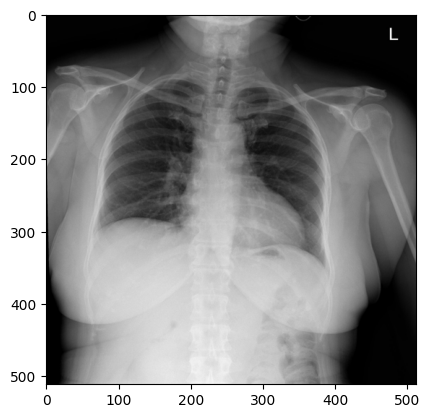

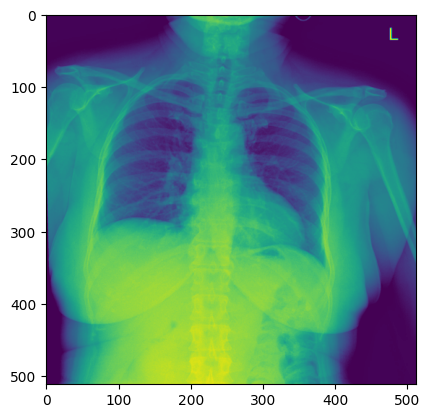

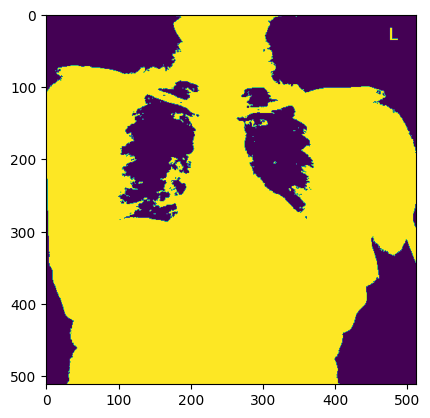

(512, 512)


In [11]:
####data(images) preprocessing########
import matplotlib.pylab as plt
Train_DIR=r'/content/drive/MyDrive/'
Categories=['Normal','Tuberculosis']
for j in Categories:
    path=os.path.join(Train_DIR,j)
    for img in os.listdir(path):
        image=cv2.imread(os.path.join(path,img))
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret,binary_image = cv2.threshold(gray_image,70,255,0)
        plt.imshow(image)
        plt.show()
        plt.imshow(gray_image)
        plt.show()
        plt.imshow(binary_image)
        plt.show()
        print(gray_image.shape)
        break
    break

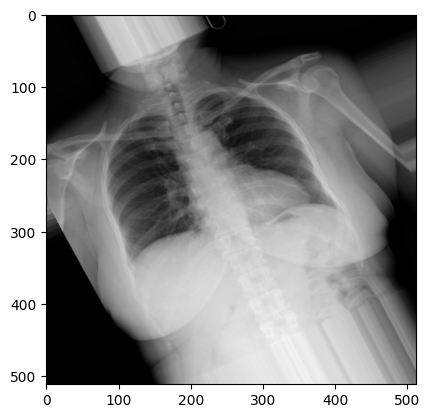

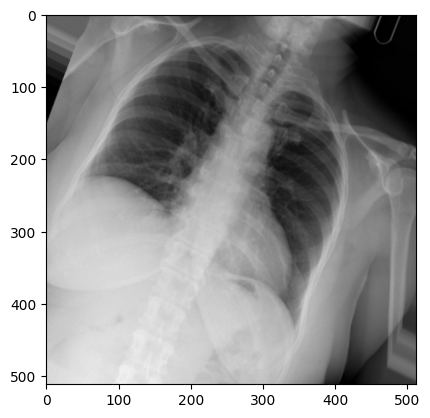

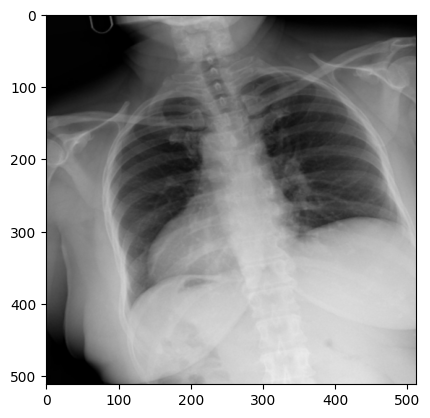

In [13]:
train_datagen = ImageDataGenerator(
           rescale=1./255,
           zoom_range=0.2,
           rotation_range = 30,
           width_shift_range = 0.1,
           horizontal_flip=True)
newImage = image.reshape((1,) + image.shape)
i=0
for batch in train_datagen.flow(newImage, batch_size=1):
        img = np.reshape(batch,(512,512,3))
        plt.imshow(img)
        plt.show()
        i += 1
        if i == 3:
                 break 

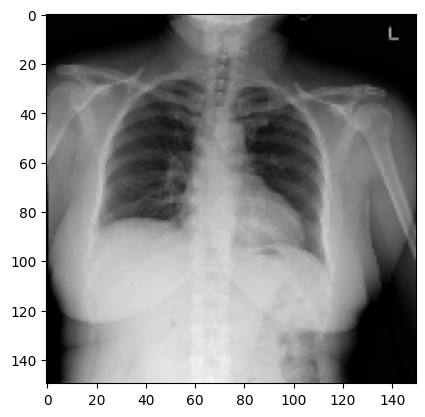

In [14]:
IMG_SIZE=150
new_image=cv2.resize(image,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_image)
plt.show()

In [15]:
def load_normal_images_and_labels():
    img_lst=[]
    labels=[]
    j=0
    for index in os.listdir('/content/drive/MyDrive/Normal'):  
        img=cv2.imread(os.path.join('/content/drive/MyDrive/Normal',index))
        #resize image to 150*150
        resized_img =cv2.resize(img,(150,150))
         # convert image to gray
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        # convert image to binary image
        ret,binary_img = cv2.threshold(gray_img,70,255,0)
        img_lst.append(binary_img)
        labels.append('Normal')
        j+=1
        
    return img_lst, labels
images1, labels1 = load_normal_images_and_labels()
print("No. of images loaded = ",len(images1),"\nNo. of labels loaded = ",len(labels1))
print(type(images1),type(labels1))

No. of images loaded =  3500 
No. of labels loaded =  3500
<class 'list'> <class 'list'>


In [17]:
def load_tuberculosis_images_and_labels():
    img_lst=[]
    labels=[]
    newImages=[]
    j=0
    for index in os.listdir('/content/drive/MyDrive/Tuberculosis'):  
        img=cv2.imread(os.path.join('/content/drive/MyDrive/Tuberculosis',index))
        #resize image to 150*150
        resized_img = cv2.resize(img,(150,150))
        lab = resized_img.reshape((1,) + resized_img.shape)
        i=0
        for batch in train_datagen.flow(lab, batch_size=1):
                 reshapedImage = np.reshape(batch,(150,150,3))
                 gray_img = cv2.cvtColor(reshapedImage, cv2.COLOR_BGR2GRAY)
                 ret,binary_img = cv2.threshold(gray_img,70,255,0)
                 newImages.append(binary_img)
                 labels.append('Tuberculosis')
                 i += 1
                 if i == 3:
                           break 
        #######################
        #######################
        # convert image to gray
        gray_img = cv2.cvtColor(resized_img, cv2.COLOR_BGR2GRAY)
        # convert image to binary image 
        ret,binary_img = cv2.threshold(gray_img,70,255,0)
        img_lst.append(binary_img)
        labels.append('Tuberculosis')
        j+=1
      
    return img_lst, labels,newImages
images2, labels2 ,newImages = load_tuberculosis_images_and_labels()
print("No. of images loaded = ",len(images2),"\nNo. of new images loaded = ",len(newImages),"\nNo. of labels loaded = ",len(labels2))
print(type(images2),type(labels2))

No. of images loaded =  700 
No. of new images loaded =  2100 
No. of labels loaded =  2800
<class 'list'> <class 'list'>


In [18]:
images=images1+images2+newImages
labels=labels1+labels2
images =np.array(images)
labels =np.array(labels)
print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (6300, 150, 150) 
Labels shape =  (6300,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [19]:
# label 0==>normal     1==>Tuberculosis
#######spliting data########
X_train=images
Y_train=labels
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size = 0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state=42)
print(X_train.shape, x_train.shape, x_test.shape,x_val.shape)


(6300, 150, 150) (3528, 150, 150) (1260, 150, 150) (1512, 150, 150)


In [20]:
####scale of each feature###
X_train_scaled = x_train/255
X_test_scaled = x_test/255
X_val_scaled=x_val/255
print(X_train_scaled.shape)
print(X_test_scaled.shape)
print(X_val_scaled.shape)


(3528, 150, 150)
(1260, 150, 150)
(1512, 150, 150)
